In [152]:
import matplotlib.pyplot as plt
import numpy as np

# Test

Initialize with b = -4

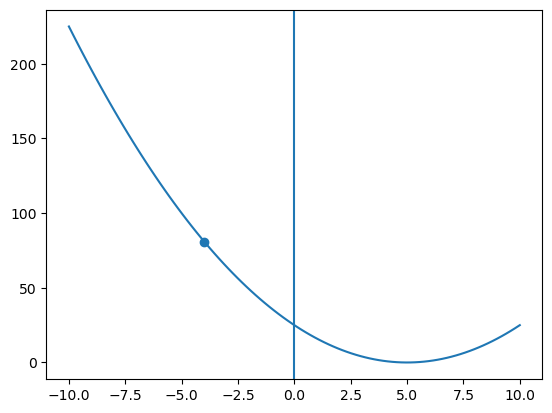

In [156]:
x = np.linspace(-10, 10, 100)
y = lambda x: (x - 5) ** 2
grad = lambda x: 2 * (x - 5)
plt.plot(x, y(x))
b = -4
lr = 0.1
plt.scatter(b, y(b))
plt.axvline(x=0)

## Use for loop to update b

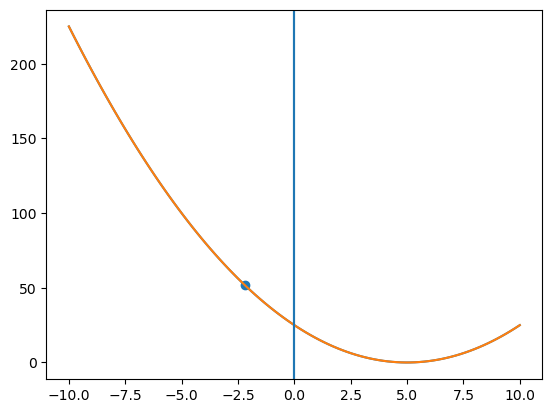

-2.2 Iter1


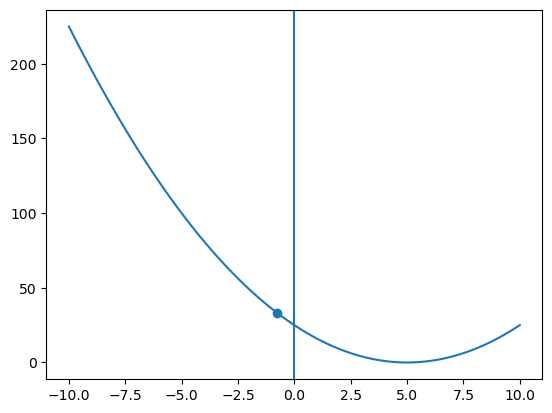

-0.76 Iter2


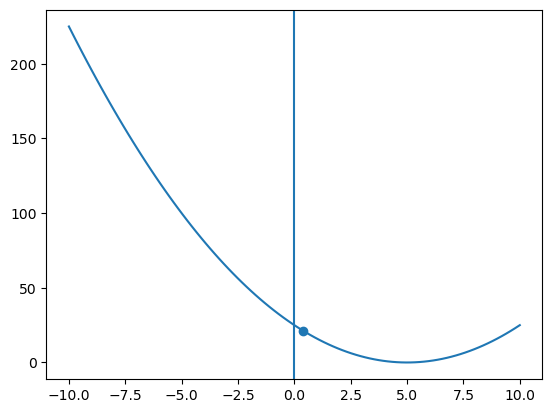

0.3919999999999999 Iter3


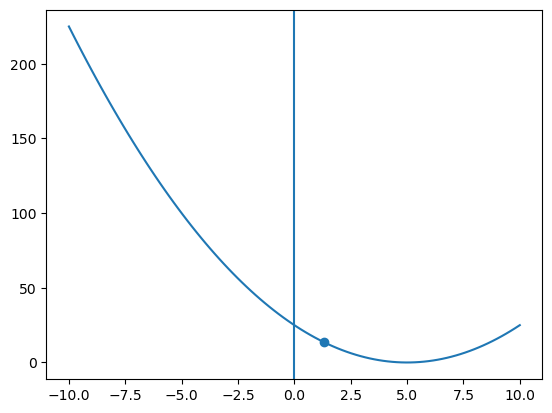

1.3136 Iter4


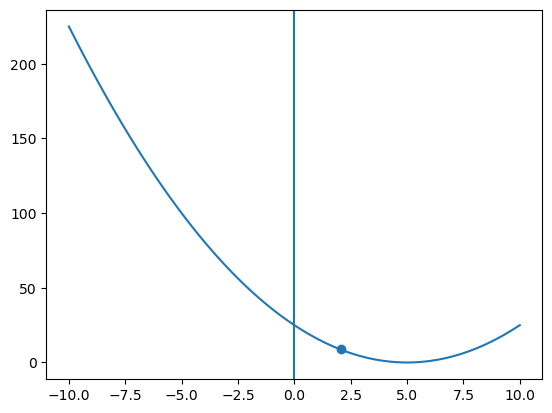

2.0508800000000003 Iter5


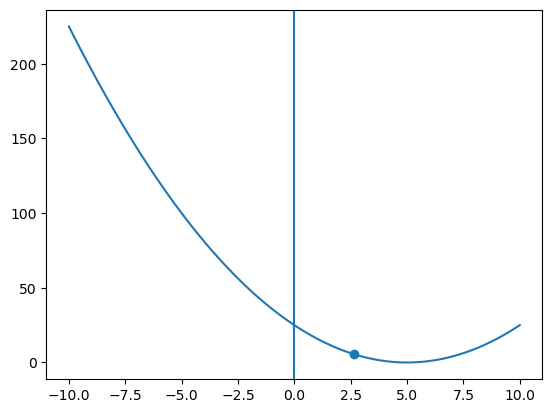

2.6407040000000004 Iter6


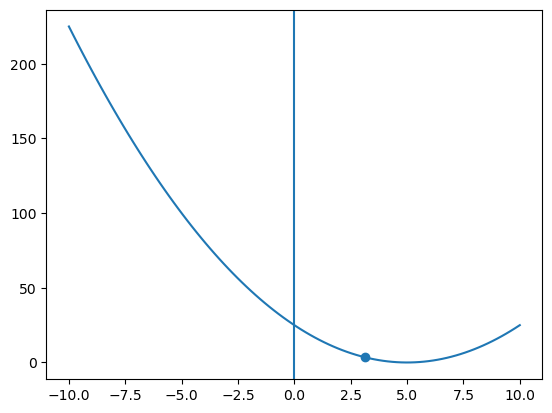

3.1125632000000003 Iter7


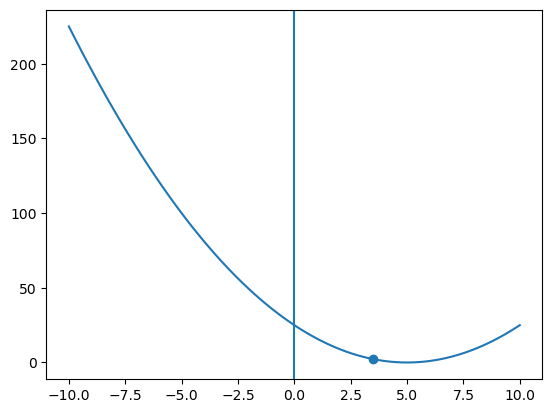

3.4900505600000002 Iter8


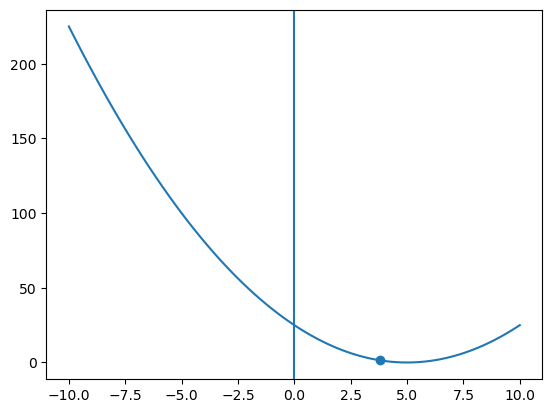

3.7920404480000003 Iter9


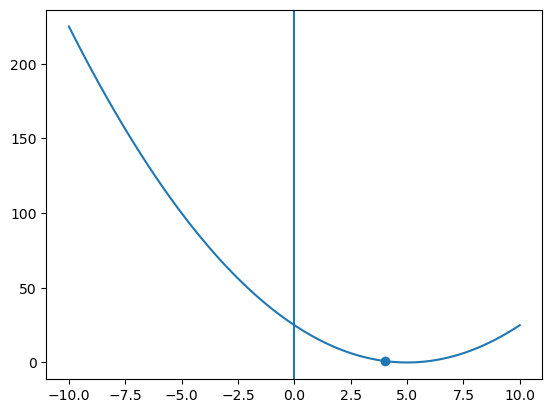

4.0336323584 Iter10


In [159]:
plt.plot(x, y(x))
plt.axvline(x=0)
max_iter = 10
for i in range(max_iter):
    b = b - lr * grad(b)
    plt.plot(x, y(x))
    plt.scatter(b, y(b))
    plt.axvline(x=0)
    plt.show()
    print(b, f'Iter{i + 1}')
    
    

## 3D graph to visualize

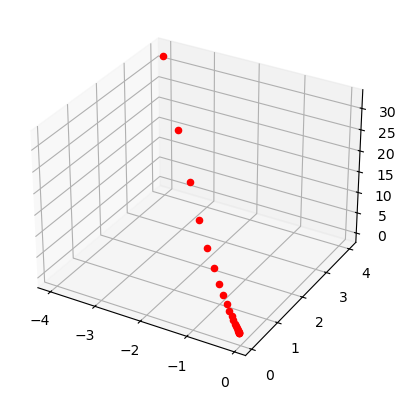

In [161]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = y = np.arange(-5, 5, 0.01)
X, Y = np.meshgrid(x, y)
Z = lambda x, y: x ** 2 + y ** 2  #z = x^2 + y^2

b_x = -5 #Initialize point at (-5, 5)
b_y = 5

grad_x = lambda x: 2 * x
grad_y = lambda y: 2 * y

for i in range(20):
    b_x -= lr * grad_x(b_x)
    b_y -= lr * grad_y(b_y)
    ax.scatter(b_x, b_y, Z(b_x , b_y), color = 'red')
ax.scatter(b_x, b_y, Z(b_x , b_y), color = 'red')

In [162]:
b_x

-0.057646075230342354

In [163]:
b_y

0.057646075230342354

# Book ML

## GD cho hàm một biến

Ta lấy ví dụ hàm mất mát là x^2 + 5sin(x)

In [167]:
def grad(x): #Gradient
    return 2*x+ 5*np.cos(x)

def cost(x): #Loss function
    return x**2 + 5*np.sin(x)

def myGD1(x0, eta):
    x = [x0]
    for it in range(100):
        x_new = x[-1] - eta*grad(x[-1])
        if abs(grad(x_new)) < 1e-3: # just a small number
            break
        x.append(x_new)
    return (x, it)

In [168]:
(x1, it1) = myGD1(-5, .1)
(x2, it2) = myGD1(5, .1)
print('Solution x1 = %f, cost = %f, after %d iterations'%(x1[-1], cost(x1[-1]), it1))
print('Solution x2 = %f, cost = %f, after %d iterations'%(x2[-1], cost(x2[-1]), it2))

Solution x1 = -1.110667, cost = -3.246394, after 11 iterations
Solution x2 = -1.110341, cost = -3.246394, after 29 iterations


Text(0.5, 1.0, 'Initialize at x = -5')

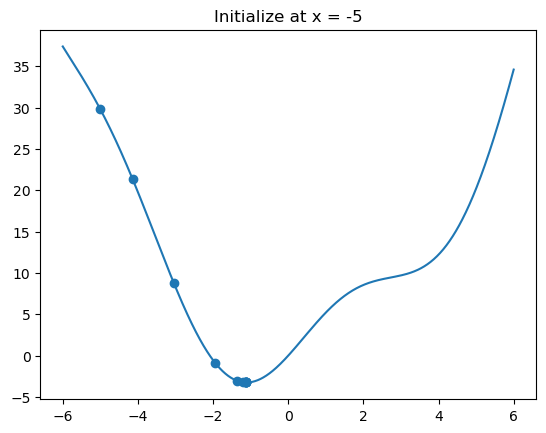

In [170]:
x = np.linspace(-6, 6, 1000)

def visualize(x0, eta):
    pos = [x0]
    for it in range(100):
        x_new = pos[-1] - eta*grad(pos[-1])
        if abs(grad(x_new)) < 1e-3: # just a small number
            break
        pos.append(x_new)
    plt.plot(x, cost(x))
    plt.scatter(np.array(pos), cost(np.array(pos)))
visualize(-5, 0.1) #initialize x = -5
plt.title('Initialize at x = -5')

Text(0.5, 1.0, 'Initialize at x = 5')

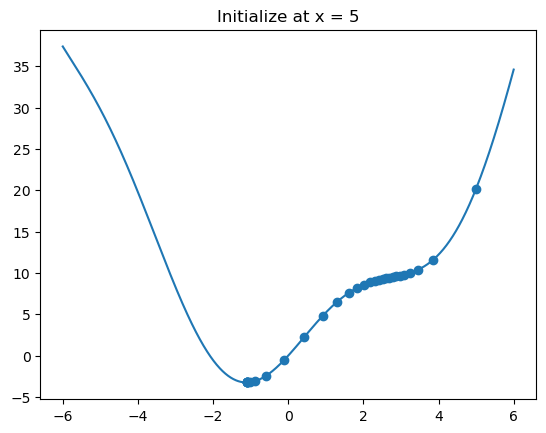

In [171]:
visualize(5, 0.1) #initialize x = 5
plt.title('Initialize at x = 5')

Ta thấy tùy vào điểm khởi tạo mà ta đạt được kết quả nhanh hay chậm

## GD cho hàm nhiều biến

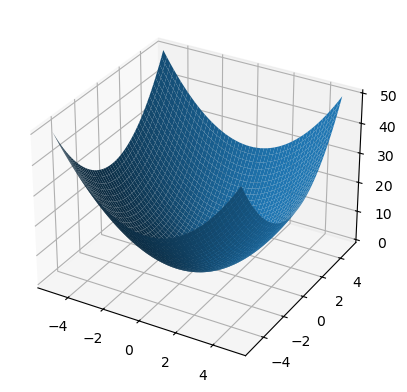

In [181]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

x = y = np.arange(-5, 5, 0.01)
X, Y = np.meshgrid(x, y)
Z = lambda x, y: x ** 2 + y ** 2  #z = x^2 + y^2

ax.plot_surface(X, Y, Z(X, Y))

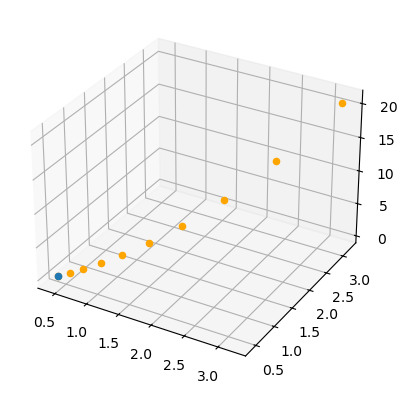

In [182]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

b_x = 4
b_y = 4
lr = 0.1

grad_x = lambda x: 2 * x
grad_y = lambda y: 2 * y

for i in range(10):
    b_x -= lr * grad_x(b_x)
    b_y -= lr * grad_y(b_y)
    ax.scatter(b_x, b_y, Z(b_x, b_y), color = 'orange')
ax.scatter(b_x, b_y, Z(b_x, b_y))

## GD cho Linear Regression

### From scratch

Ta khởi tạo bộ dữ liệu X với các điểm dữ liệu là các hàng, và các điểm dữ liệu y được định nghĩa gần đường thằng y = 4 + 3x

In [188]:
X = np.random.rand(1000)
y = 4 + 3 * X + .5*np.random.randn(1000) # noise added

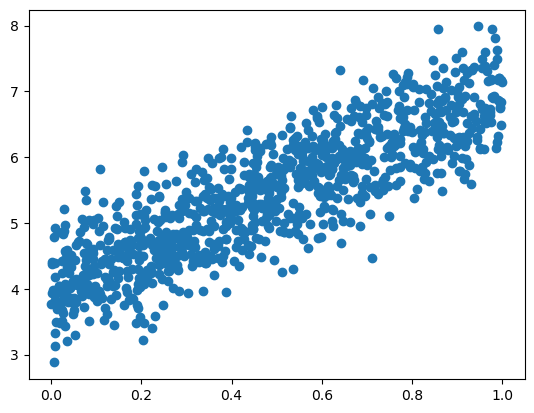

In [190]:
plt.scatter(X, y)

Khởi tạo ma trận Xbar với các điểm dữ liệu là hàng, lưu ý ở đây ta đang dùng bias trick, nghĩa là mỗi vector hàng sẽ đều bắt đầu bởi x_o = 1

In [193]:
one = np.ones((X.shape[0],1))
Xbar = np.concatenate((one, X.reshape(-1, 1)), axis = 1)

In [195]:
Xbar

array([[1.        , 0.25490514],
       [1.        , 0.50504841],
       [1.        , 0.19413294],
       ...,
       [1.        , 0.72412031],
       [1.        , 0.17888722],
       [1.        , 0.5255777 ]])

Ta viết hàm để tính hàm mất mát và gradient của hàm mất mát

In [198]:
def grad(w): #Tính gradient của hàm mất mát
    N = Xbar.shape[0]
    return 1/N * Xbar.T.dot(Xbar.dot(w) - y.reshape(-1 ,1))
def cost(w): #Hàm mất mát
    N = Xbar.shape[0]
    return .5/N*np.linalg.norm(y - Xbar.dot(w))**2

Implement thuật toán Gradient Descent

In [220]:
def myGD(w_init, grad, eta):
    w = [w_init]
    for it in range(100):
        w_new = w[-1] - eta*grad(w[-1]) #Hàm mất mát là hàm 2 biến nên ta khẳng định gradient của hàm này phải là cỡ (2, 1)
        if np.linalg.norm(grad(w_new))/len(w_new) < 1e-3:
            break
        w.append(w_new)
    return w, it

def visualize(a, b, title=''):
    x = np.linspace(0, 1, 100)
    y = lambda x: a * x + b
    plt.plot(x, y(x), color='red')
    plt.title(title)

In [222]:
w_init = np.array([[2], [1]]) #Khởi tạo điểm ban đầu
grad(w_init).shape #Gradient của hàm số tại w_init

(2, 1)

In [224]:
w1, it1 = myGD(w_init, grad, 1) #w1 là 1 list các điểm tính toán được bằng thuật toán bắt đầu bằng điểm khởi tạo

In [226]:
print('Sol found by GD: w = ', w1[-1].T, ',\nafter %d iterations.' %(it1+1))

Sol found by GD: w =  [[4.03381019 2.91329429]] ,
after 50 iterations.


### Visualize

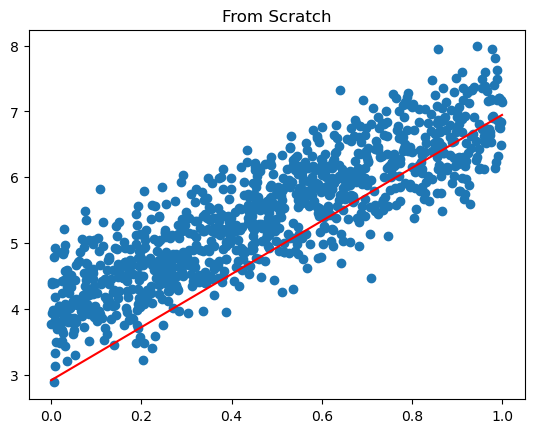

In [229]:
coef = w1[-1]
plt.scatter(X, y)
visualize(coef[0][0], coef[1][0], 'From Scratch')

### Using scikit-learn library

In [232]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X.reshape(-1, 1), y.reshape(-1, 1)) # luôn lưu ý đầu vào phải là mảng 2 chiều
w, b = model.coef_[0][0], model.intercept_[0]
sol_sklearn = np.array([b, w])
print(sol_sklearn)

[4.01974156 2.94093429]


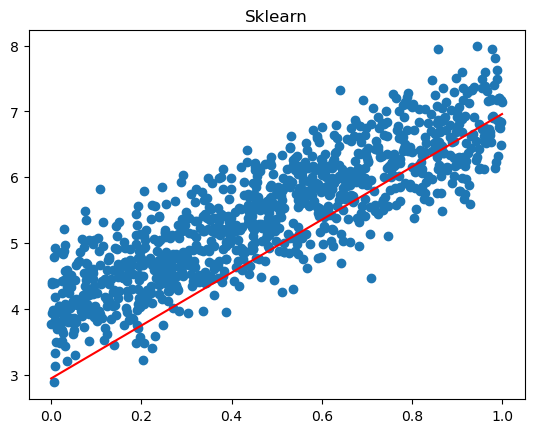

In [234]:
visualize(sol_sklearn[0], sol_sklearn[1], 'Sklearn')
plt.scatter(X, y)

Ta thấy 2 phương pháp cho ta kết quả gần giống nhau

In [237]:
X.reshape(-1,1).shape

(1000, 1)

## GD với momentum

In [240]:
theta = np.array([[1],[2]])

In [242]:
np.zeros_like(theta)

array([[0],
       [0]])

In [244]:
def GD_momentum(grad, theta_init, eta, gamma):
    # Suppose we want to store history of theta
    theta = [theta_init]
    v_old = np.zeros_like(theta_init)
    for it in range(100):
        v_new = gamma*v_old + eta*grad(theta[-1])
        theta_new = theta[-1] - v_new
        if np.linalg.norm(grad(theta_new))/np.array(theta_init).size < 1e-3:
            break
        theta.append(theta_new)
        v_old = v_new
    return theta

In [246]:
coef = GD_momentum(grad, w_init, 0.1, 0.9)[-1]

In [248]:
coef

array([[4.02745597],
       [2.93991272]])

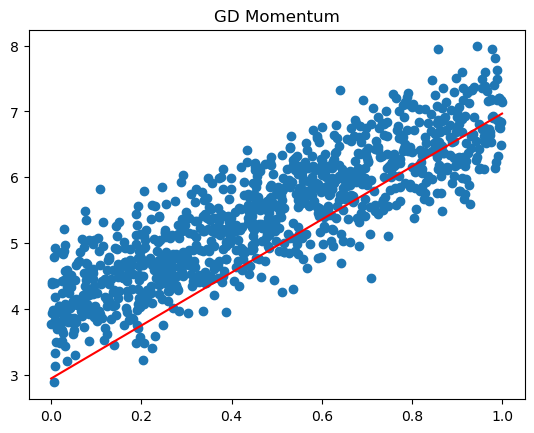

In [252]:
plt.scatter(X, y)
visualize(coef[0][0], coef[1][0], 'GD Momentum')